# Task 1

In [1]:
import pandas as pd

path = 'S_Data/'
endpoint = '.csv'

csvs = ['customers', 
        'geolocation', 
        'order_items', 
        'order_payments', 
        'order_reviews', 
        'orders', 
        'product_category_name_translation',
        'products',
        'sellers']
dfs = {}

for name in csvs:
    dfs[name] = pd.read_csv(path+name+endpoint)

### Code

#### 1. Preprocess data

In [2]:
dfs['products'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [3]:
dfs['product_category_name_translation'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [4]:
## get english category name

dfs['products'] = dfs['products'].merge(dfs['product_category_name_translation'],
                                        how = 'inner',
                                        on = 'product_category_name')

In [5]:
dfs['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
dfs['orders']['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [7]:
## get only valid orders
dfs['orders'] = dfs['orders'].loc[(dfs['orders']['order_status'] != 'canceled') & 
                                  (dfs['orders']['order_status'] != 'unavailable')]

In [8]:
## merge dataframes for product id, price, number of ordered items, reviews
dfs['orders'] = dfs['order_items'].merge(dfs['orders'], on = 'order_id', how = 'right')
dfs['orders'] = dfs['orders'].merge(dfs['order_reviews'], on='order_id', how ='left')
dfs['orders'] = dfs['orders'].merge(dfs['products'], on = 'product_id', how = 'left')

In [9]:
dfs['orders']['order_purchase_timestamp'] = pd.to_datetime(dfs['orders']['order_purchase_timestamp']).dt.normalize()
dfs['orders']['order_delivered_customer_date'] = pd.to_datetime(dfs['orders']['order_delivered_customer_date']).dt.normalize()
dfs['orders']['review_creation_date'] = pd.to_datetime(dfs['orders']['review_creation_date']).dt.normalize()
dfs['orders'].rename(columns = {'order_purchase_timestamp': 'purchase_date', 
                                'order_delivered_customer_date': 'delivered_date',
                                'review_creation_date': 'review_date',
                                'product_category_name_english': 'product_category'}, inplace= True)
## fill nan values after grouping by product id so values are more reliable
dfs['orders'] = dfs['orders'].sort_values(by='product_id')
dfs['orders']['delivered_date'].ffill(inplace=True)

/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_20595/1876198484.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs['orders']['delivered_date'].ffill(inplace=True)


In [10]:
dfs['orders'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,purchase_date,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
103107,f30149f4a8882a08895b6a242aa0d612,1.0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59,86c180c33f454b35e1596a99da3dddc4,delivered,2018-05-20,...,2018-06-08 10:59:20,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0,perfumery
107755,f5eda0ded77c1293b04c953138c8331d,1.0,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93,68f2b37558e27791155db34bcded5ac0,delivered,2017-12-12,...,2017-12-27 13:23:27,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0,auto
46999,0bf736fd0fd5169d60de3699fcbcf986,1.0,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10,6cd217b674e22cf568f6a2cf6060fd07,delivered,2017-12-21,...,2018-01-11 11:03:53,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0,bed_bath_table
106851,3aba44d8e554ab4bb8c09f6f78032ca8,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60,82b838f513e00463174cc7cae7e76c1f,delivered,2018-08-10,...,2018-08-22 12:40:29,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares
30045,6f0dfb5b5398b271cc6bbd9ee263530e,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60,8517e7c86998bf39a540087da6f115d9,delivered,2018-08-01,...,2018-08-08 23:48:48,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0,housewares


#### 2. First approach, grouping data for each day and predicting sale for each day

##### Data preprocess

In [12]:
# calculate delivery time
dfs['orders']['delivery_time'] = (dfs['orders']['delivered_date'] - dfs['orders']['purchase_date']).dt.days

# if new product = True group by product id instead of product category for sale prediction
new_product = False

if not new_product:
    groupby_col = 'product_category'
else:
    groupby_col = 'product_id'
# get average review score from last 14 days
review_score = dfs['orders'].groupby(groupby_col).apply(
    lambda x: x.set_index('review_date').resample('D')['review_score'].mean().rolling(window='14D').mean()
).reset_index()

review_score.rename(columns={'review_score': 'avg_review_score_from_last_14_days',
                             'review_date': 'purchase_date'}, inplace= True)
# get number of sold items, avg item price, avg freight value and avg delivery time for each category each day
daily_sales = dfs['orders'].groupby([groupby_col, 
                                     'purchase_date']).agg({'order_item_id': 'sum', 
                                                            'price': 'mean', 
                                                            'freight_value': 'mean',
                                                            'delivery_time': 'mean'}
                                                          ).reset_index()

daily_sales.rename(columns={'order_item_id': 'daily_sales'}, inplace= True)
# merge daily sales df to get review score from last 14 days
daily_sales = daily_sales.merge(review_score, how='left', on=[groupby_col, 'purchase_date'])

# function adding sale from last 14 days
def day_shift(df, shift):
    for lag in range(1, shift+1):
        df[f'sales_{lag}_day_ago'] = df['daily_sales'].shift(lag)
    return df

shift = 14

daily_sales = day_shift(daily_sales, shift)
daily_sales.dropna()
daily_sales['month'] = daily_sales['purchase_date'].dt.month
daily_sales['day_of_month'] = daily_sales['purchase_date'].dt.day
daily_sales['day_of_week'] = daily_sales['purchase_date'].dt.dayofweek

# dividing columns for training and test
shifted_cols = [f'sales_{lag}_day_ago' for lag in range(1, shift+1)]
features = ['month', 'delivery_time', 'day_of_week', 'price', 'freight_value', 
            'avg_review_score_from_last_14_days', 'day_of_month'] + shifted_cols
target = 'daily_sales'

/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_20595/681894156.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  review_score = dfs['orders'].groupby(groupby_col).apply(


##### Plots showing correlation between daily sales and other values

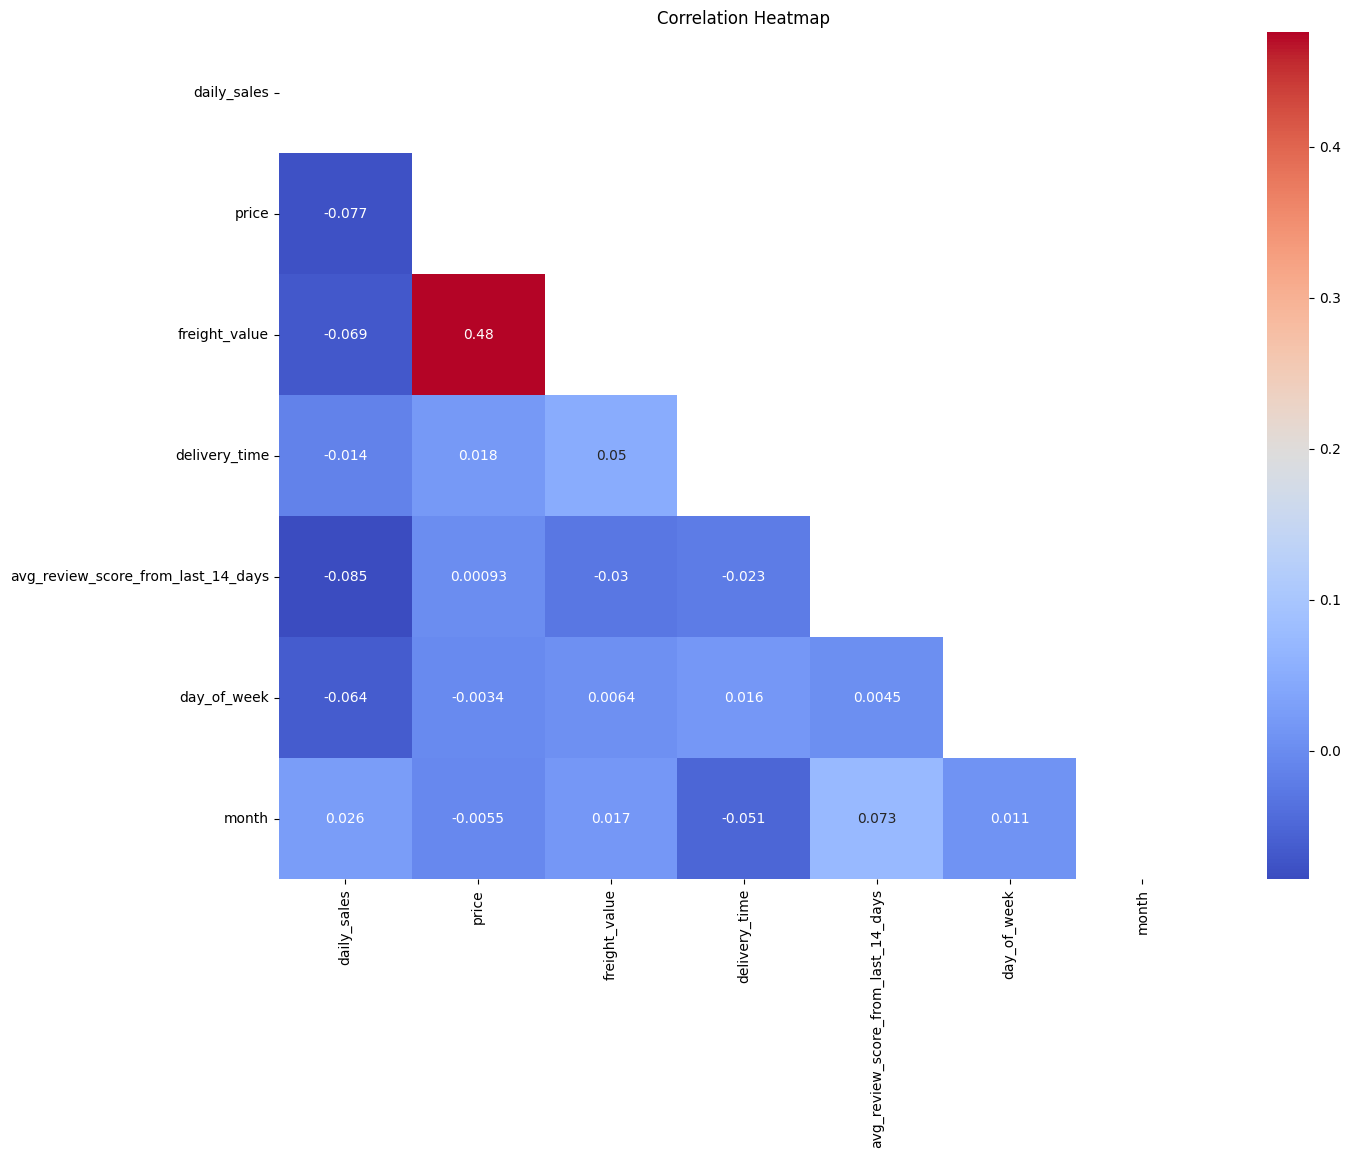

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

correlation_matrix = daily_sales[['daily_sales', 'price', 'freight_value', 'delivery_time', 'avg_review_score_from_last_14_days', 'day_of_week', 'month']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize = (15,11))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

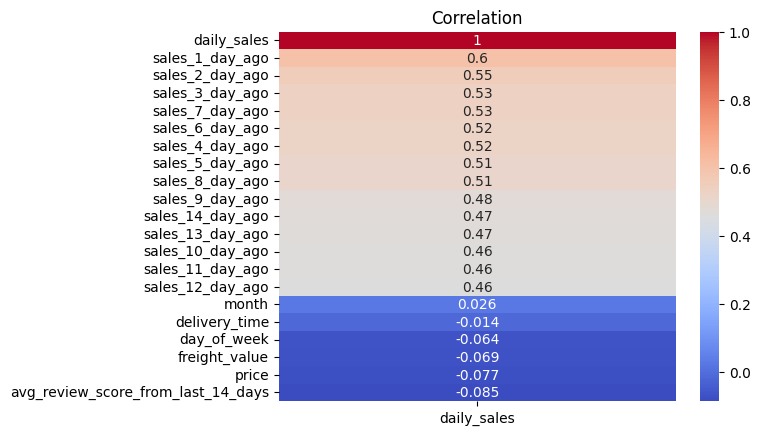

In [14]:
correlation_matrix = daily_sales[['daily_sales', 'price', 'freight_value', 'delivery_time', 'avg_review_score_from_last_14_days', 'day_of_week', 'month']+shifted_cols].corr()
sns.heatmap(correlation_matrix[['daily_sales']].sort_values(by='daily_sales', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

##### Machine Learning

In [15]:
start_date = daily_sales['purchase_date'].min()
end_date = daily_sales['purchase_date'].max()
print(start_date, end_date)

2016-09-04 00:00:00 2018-09-03 00:00:00


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

train = daily_sales[daily_sales['purchase_date'] <= '2018-04-01']
test = daily_sales[daily_sales['purchase_date'] > '2018-04-01']

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

#machine learning model: randomforestregressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'MSE: {mse_rf}')

MSE: 49.323766550841256


##### Prediction for each category

In [24]:
if not new_product:
    # predict
    categories = daily_sales['product_category'].unique()
    
    predictions_df = pd.DataFrame(columns=['date'] + list(categories))
    
    for category in categories:
        
        category_data = daily_sales[daily_sales['product_category'] ==category]
        cateogry_data = category_data.sort_values(by='purchase_date')
        end_date = category_data['purchase_date'].max()
        
        future_sale = category_data.iloc[[-1]].copy()
        future_sale = future_sale[features]
        
        next_dates = [end_date + pd.Timedelta(days=i) for i in range(1, 15)]
    
        category_predictions = []
        
        for date in next_dates:
            future_sale['purchase_date'] = date
            future_sale['month'] = date.month
            future_sale['day_of_month'] = date.day
            future_sale['day_of_week'] = date.dayofweek
            
            pred = model_rf.predict(future_sale[features])
            category_predictions.append(pred[0])
        
            for lag in range(14, 1, -1):
                future_sale[f'sales_{lag}_day_ago'] = future_sale[f'sales_{lag-1}_day_ago']
            future_sale['sales_1_day_ago'] = pred[0]
    
        predictions_df_category = pd.DataFrame({'date': next_dates, category: category_predictions})
        predictions_df_category.fillna(0, inplace=True)
        predictions_df = pd.concat([predictions_df, predictions_df_category], ignore_index=True)

/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_20595/3445850224.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, predictions_df_category], ignore_index=True)
/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_20595/3445850224.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df = pd.concat([predictions_df, predictions_df_category], ignore_index=True)
/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_20595

In [25]:
# Print the prediction DataFrame
# Here we have prediction for every category.
# For each category last last  date was taken individually
if not new_product:
    print(predictions_df.head())

        date  agro_industry_and_commerce  air_conditioning  art  \
0 2018-08-27                        3.48               NaN  NaN   
1 2018-08-28                        3.61               NaN  NaN   
2 2018-08-29                        3.58               NaN  NaN   
3 2018-08-30                        2.89               NaN  NaN   
4 2018-08-31                        3.61               NaN  NaN   

   arts_and_craftmanship  audio  auto  baby  bed_bath_table  \
0                    NaN    NaN   NaN   NaN             NaN   
1                    NaN    NaN   NaN   NaN             NaN   
2                    NaN    NaN   NaN   NaN             NaN   
3                    NaN    NaN   NaN   NaN             NaN   
4                    NaN    NaN   NaN   NaN             NaN   

   books_general_interest  ...  security_and_services  signaling_and_security  \
0                     NaN  ...                    NaN                     NaN   
1                     NaN  ...                    NaN   

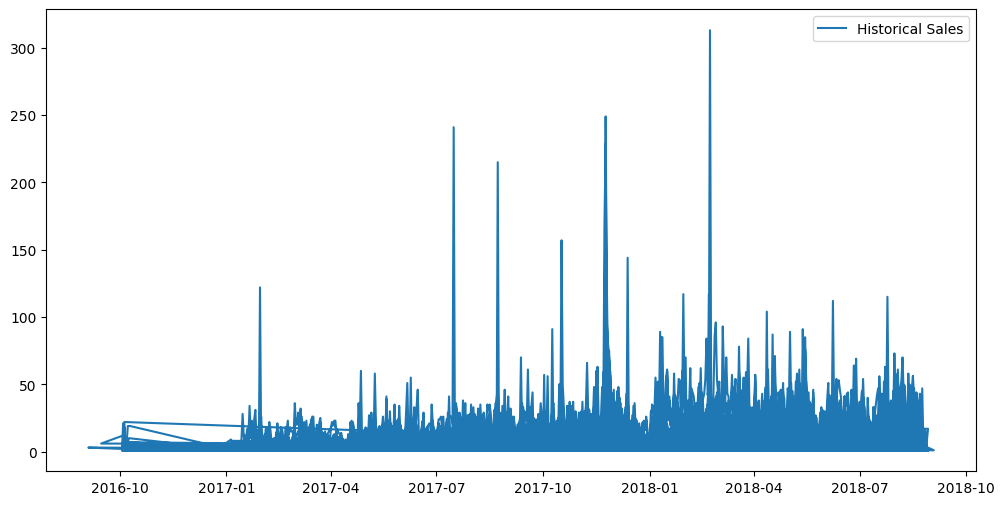

In [26]:
if not new_product:
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['purchase_date'], daily_sales['daily_sales'], label='Historical Sales')
    plt.legend()
    plt.show()

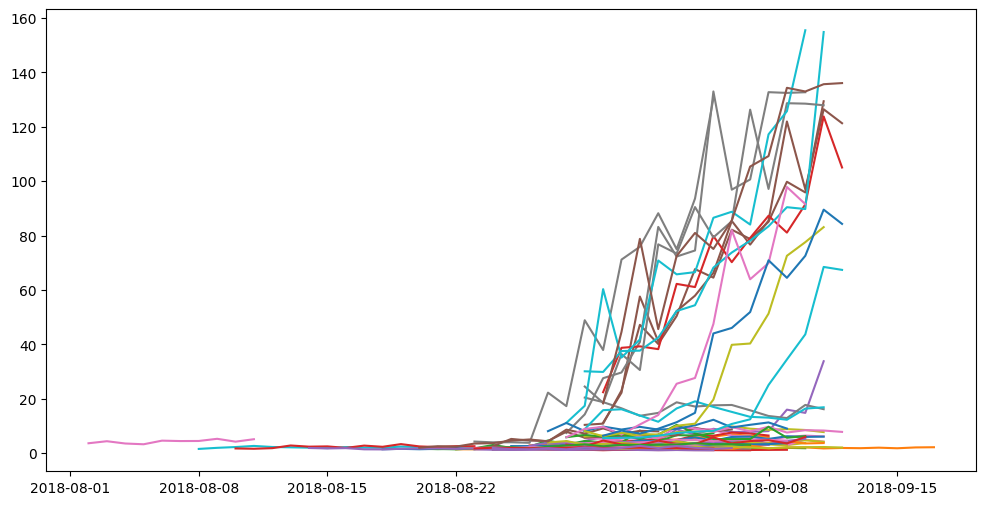

In [27]:
if not new_product:
    # Plotting the forecasts
    df = predictions_df[predictions_df['date'] > '2018-08-01']
    plt.figure(figsize=(12, 6))
    for category in categories:
        plt.plot(df['date'], df[category], label=f'Predicted Sales for {category}')
    
    plt.show()

##### Prediction only for categories that occured last date

In [28]:
if not new_product:
    # predict
    end_date = daily_sales['purchase_date'].max() - pd.Timedelta(days=7)
    last_date = daily_sales[daily_sales['purchase_date']==end_date]
    categories = last_date['product_category'].unique()
    
    predictions_df2 = pd.DataFrame(columns=['date'] + list(categories))
    
    next_dates = [end_date + pd.Timedelta(days=i) for i in range(1, 15)]
    
    for category in categories:
        
        category_data = daily_sales[daily_sales['product_category'] ==category]
        category_data = category_data.sort_values(by='purchase_date')
        
        future_sale = category_data.iloc[[-1]].copy()
        future_sale = future_sale[features]
        
        category_predictions = []
        
        for date in next_dates:
            future_sale['purchase_date'] = date
            future_sale['month'] = date.month
            future_sale['day_of_month'] = date.day
            future_sale['day_of_week'] = date.dayofweek
            
            pred = model_rf.predict(future_sale[features])
            category_predictions.append(pred[0])
        
            for lag in range(14, 1, -1):
                future_sale[f'sales_{lag}_day_ago'] = future_sale[f'sales_{lag-1}_day_ago']
            future_sale['sales_1_day_ago'] = pred[0]
    
        predictions_df_category = pd.DataFrame({'date': next_dates, category: category_predictions})
        predictions_df2 = pd.concat([predictions_df2, predictions_df_category], ignore_index=True)

/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_20595/1441834152.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df2 = pd.concat([predictions_df2, predictions_df_category], ignore_index=True)
/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_20595/1441834152.py:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  predictions_df2 = pd.concat([predictions_df2, predictions_df_category], ignore_index=True)
/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_2

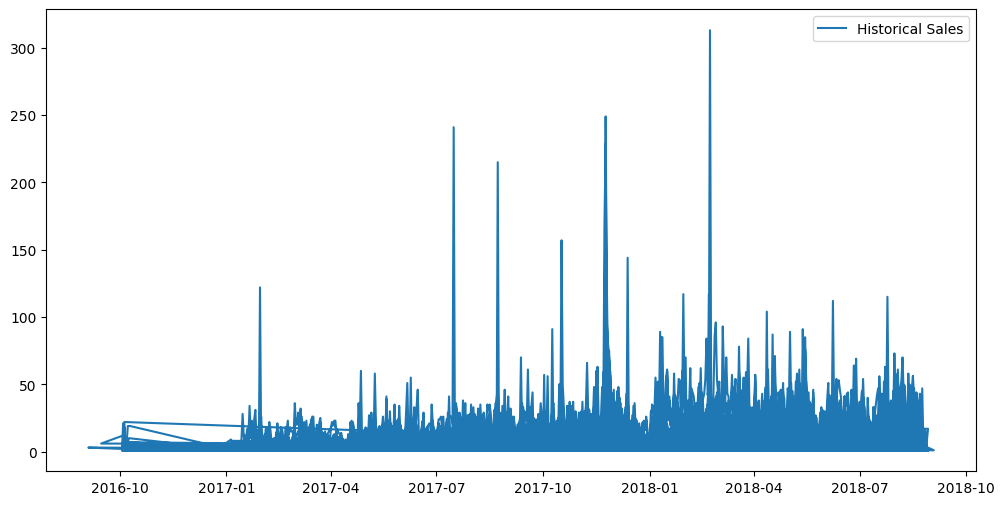

In [29]:
if not new_product:
    plt.figure(figsize=(12, 6))
    plt.plot(daily_sales['purchase_date'], daily_sales['daily_sales'], label='Historical Sales')
    plt.legend()
    plt.show()

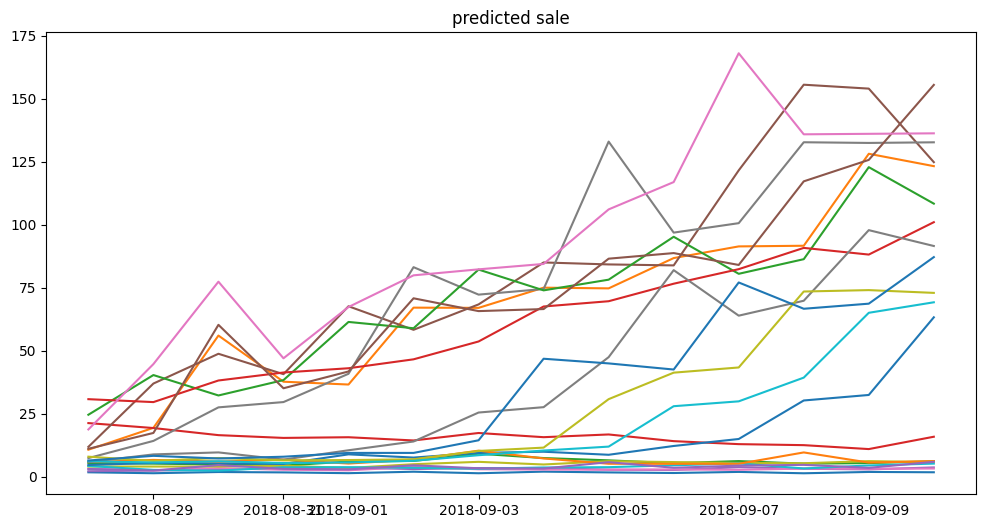

total sale in 14 days for auto category: 966.19


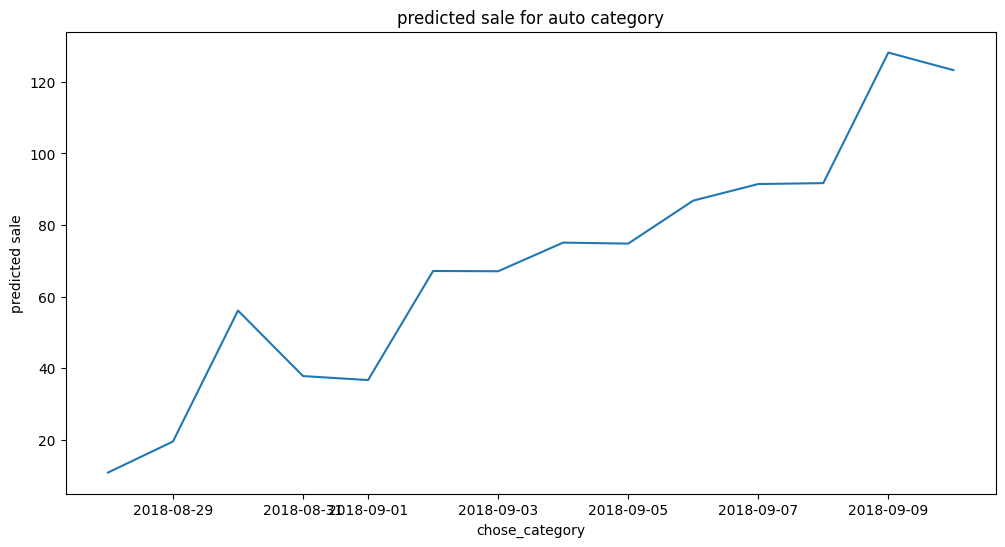

In [32]:
if not new_product:
    # Plotting the forecasts
    plt.figure(figsize=(12, 6))
    for category in categories:
        plt.plot(predictions_df2['date'], predictions_df2[category], label=f'Predicted Sales for {category}')
    
    plt.title('predicted sale')
    plt.show()
    chose_category = 'auto'
    if chose_category in predictions_df2.columns:
        print(f'total sale in 14 days for {chose_category} category: {predictions_df2[chose_category].sum()}')
        plt.figure(figsize=(12, 6))
        plt.plot(predictions_df2['date'], predictions_df2[chose_category])
        plt.xlabel('chose_category')
        plt.ylabel('predicted sale')
        plt.title(f'predicted sale for {chose_category} category')
        plt.show()
    

##### Predict for new product

In [34]:
if new_product:
    # predict
    end_date = daily_sales['purchase_date'].max() - pd.Timedelta(days=7)
    last_date = daily_sales[daily_sales['purchase_date']==end_date]
    products = last_date['product_id'].unique()
    
    predictions_df2 = pd.DataFrame(columns=['date'] + list(products))
    
    next_dates = [end_date + pd.Timedelta(days=i) for i in range(1, 15)]
    
    for product in products:
        
        product_data = daily_sales[daily_sales['product_id'] ==product]
        product_data = product_data.sort_values(by='purchase_date')
        
        future_sale = product_data.iloc[[-1]].copy()
        future_sale = future_sale[features]
        
        product_predictions = []
        
        for date in next_dates:
            future_sale['purchase_date'] = date
            future_sale['month'] = date.month
            future_sale['day_of_month'] = date.day
            future_sale['day_of_week'] = date.dayofweek
            
            pred = model_rf.predict(future_sale[features])
            product_predictions.append(pred[0])
        
            for lag in range(14, 1, -1):
                future_sale[f'sales_{lag}_day_ago'] = future_sale[f'sales_{lag-1}_day_ago']
            future_sale['sales_1_day_ago'] = pred[0]
    
        predictions_df_product = pd.DataFrame({'date': next_dates, product: product_predictions})
        predictions_df2 = pd.concat([predictions_df2, predictions_df_product], ignore_index=True)
        
    # new product parameters, if you want to predict new product sale
    # change new_product parameter in preprocess data to True
    p_weight = 0
    p_price = 0
    dev = 0,1
    p_category = 'category'
    products = daily_sales.merge(dfs['products'][['product_id', 'product_weight_g']], on='product_id', how='left')
    # find similar product
    similar_products = products[(
        products['product_weight_g'] >= p_weight*(1-dev))&(
        products['product_weight_g'] <= p_weight*(1+dev))&(
        products['product_category'] == category)&(
        products['price'] >= p_price*(1-dev))&(
        products['price'] <= p_price*(1+dev))]['product_id'].unique()
    
    if len(similar_products):
        print('no similar products were found, try to change parameters')
    else:
        prod_pred = predictions_df2[predictions_df2['product_id'].isin(similar_products)]
        # Plotting the forecasts
        plt.figure(figsize=(12, 6))
        for product in similar_products:
            plt.plot(prod_pred['date'], prod_pred[product], label=f'Predicted Sales for {product}')
        
        plt.show()

##### Classical time series

In [35]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Function to fit SARIMA model and make forecasts
def fit_sarima(df, category):
    # Filter data for the current category
    category_data = df[df['product_category'] == category].copy()
    
    # Define the SARIMA model
    model = SARIMAX(category_data['daily_sales'], 
                    order=(1, 1, 1),              # ARIMA parameters (p, d, q)
                    seasonal_order=(1, 1, 1, 14), # Seasonal parameters (P, D, Q, S)
                    enforce_stationarity=False,  # Allow non-stationary data
                    enforce_invertibility=False) # Allow invertibility issues
    
    # Fit the SARIMA model
    fitted_model = model.fit(disp=False)
    
    # Make forecasts
    forecast = fitted_model.forecast(steps=14)  # Forecast for the next 14 days
    
    return forecast

# List to store forecasts for each category
forecasts = []

# Iterate over each category
for category in daily_sales['product_category'].unique():
    # Fit SARIMA model and make forecasts
    forecast = fit_sarima(daily_sales, category)
    forecasts.append({'category': category, 'forecast': forecast})

/Users/paulinapostek/Documents/Python/tasks/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/paulinapostek/Documents/Python/tasks/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/paulinapostek/Documents/Python/tasks/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/paulinapostek/Documents/Python/tasks/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will 

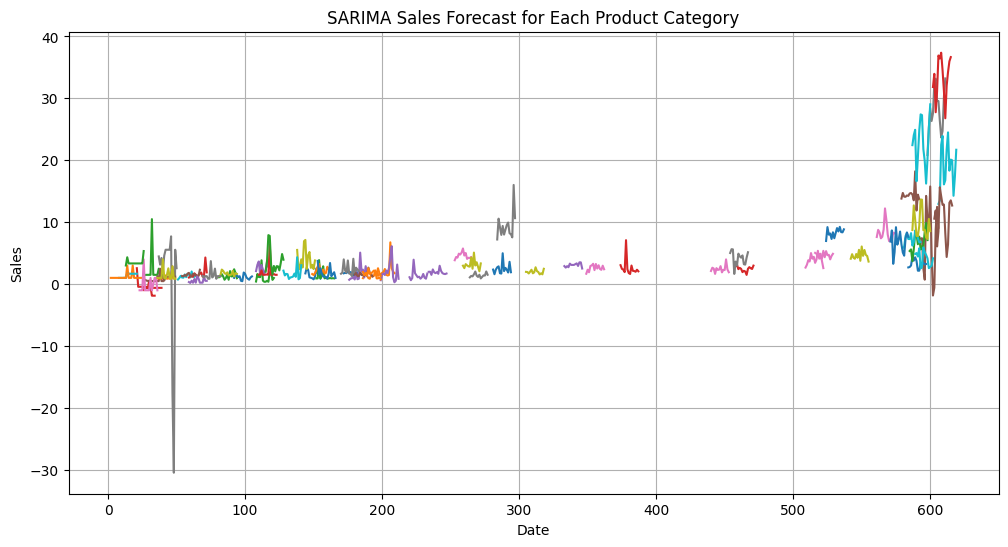

In [36]:
# Plot the forecasts for each category
plt.figure(figsize=(12, 6))

for item in forecasts:
    plt.plot(item['forecast'], label=f'Forecast for {item["category"]}')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('SARIMA Sales Forecast for Each Product Category')
plt.grid(True)
plt.show()

#### 3. Second approach, grouping data for 14 days period and predicting whole sale in 14 days

##### Preprocess data

In [37]:
dfs['orders']['delivery_time'] = (dfs['orders']['delivered_date'] - dfs['orders']['purchase_date']).dt.days

def preprocess_data(df):
    df = df.set_index('purchase_date').resample('14D').agg({'order_item_id': 'sum', 
                                                          'price': 'mean', 
                                                          'delivery_time': 'mean',
                                                          'freight_value': 'mean'}).fillna(0)
    
    df['sales_14days_sum'] = df['order_item_id']
    df['price_14days_avg'] = df['price']
    df['delivery_14days_avg'] = df['delivery_time']
    df['freight_value'] = df['freight_value']
    return df

sales_14d = dfs['orders'].groupby('product_category').apply(preprocess_data).reset_index()

def calculate_avg_review_score(df):
    df = df.sort_values('review_date')
    df['avg_review_score_up_to_date'] = df['review_score'].expanding().mean()
    return df

avg_review_score = dfs['orders'].groupby('product_category').apply(calculate_avg_review_score)

avg_review_score.reset_index(drop=True, inplace=True)

# Merge average review score with sales data
merged = pd.merge_asof(sales_14d.sort_values('purchase_date'), 
                       avg_review_score[['product_category', 'review_date', 'avg_review_score_up_to_date']].sort_values('review_date'), 
                       left_on='purchase_date', 
                       right_on='review_date', 
                       by='product_category', 
                       direction='backward')

# Drop unnecessary columns and rename for clarity
merged.drop(columns=['review_date'], inplace=True)
merged.rename(columns={'avg_review_score_up_to_date': 'avg_review_score_from_last_14_days'}, inplace=True)

merged['sales_previous_two_weeks'] = merged['sales_14days_sum'].shift(1)
merged.dropna(inplace= True)
merged['month'] = merged['purchase_date'].dt.month
merged['day_of_month'] = merged['purchase_date'].dt.day
merged['day_of_week'] = merged['purchase_date'].dt.dayofweek

features = ['month', 'day_of_month', 'day_of_week', 'price_14days_avg', 'freight_value', 
            'delivery_14days_avg', 'sales_previous_two_weeks', 'avg_review_score_from_last_14_days'] 
target = 'sales_14days_sum'

/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_20595/1983058747.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sales_14d = dfs['orders'].groupby('product_category').apply(preprocess_data).reset_index()
/var/folders/bz/m_9l75x14kz_37vfj8r34b2r0000gn/T/ipykernel_20595/1983058747.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  avg_review_score = dfs['orders'].groupby('product_category').

##### Plots with correlations

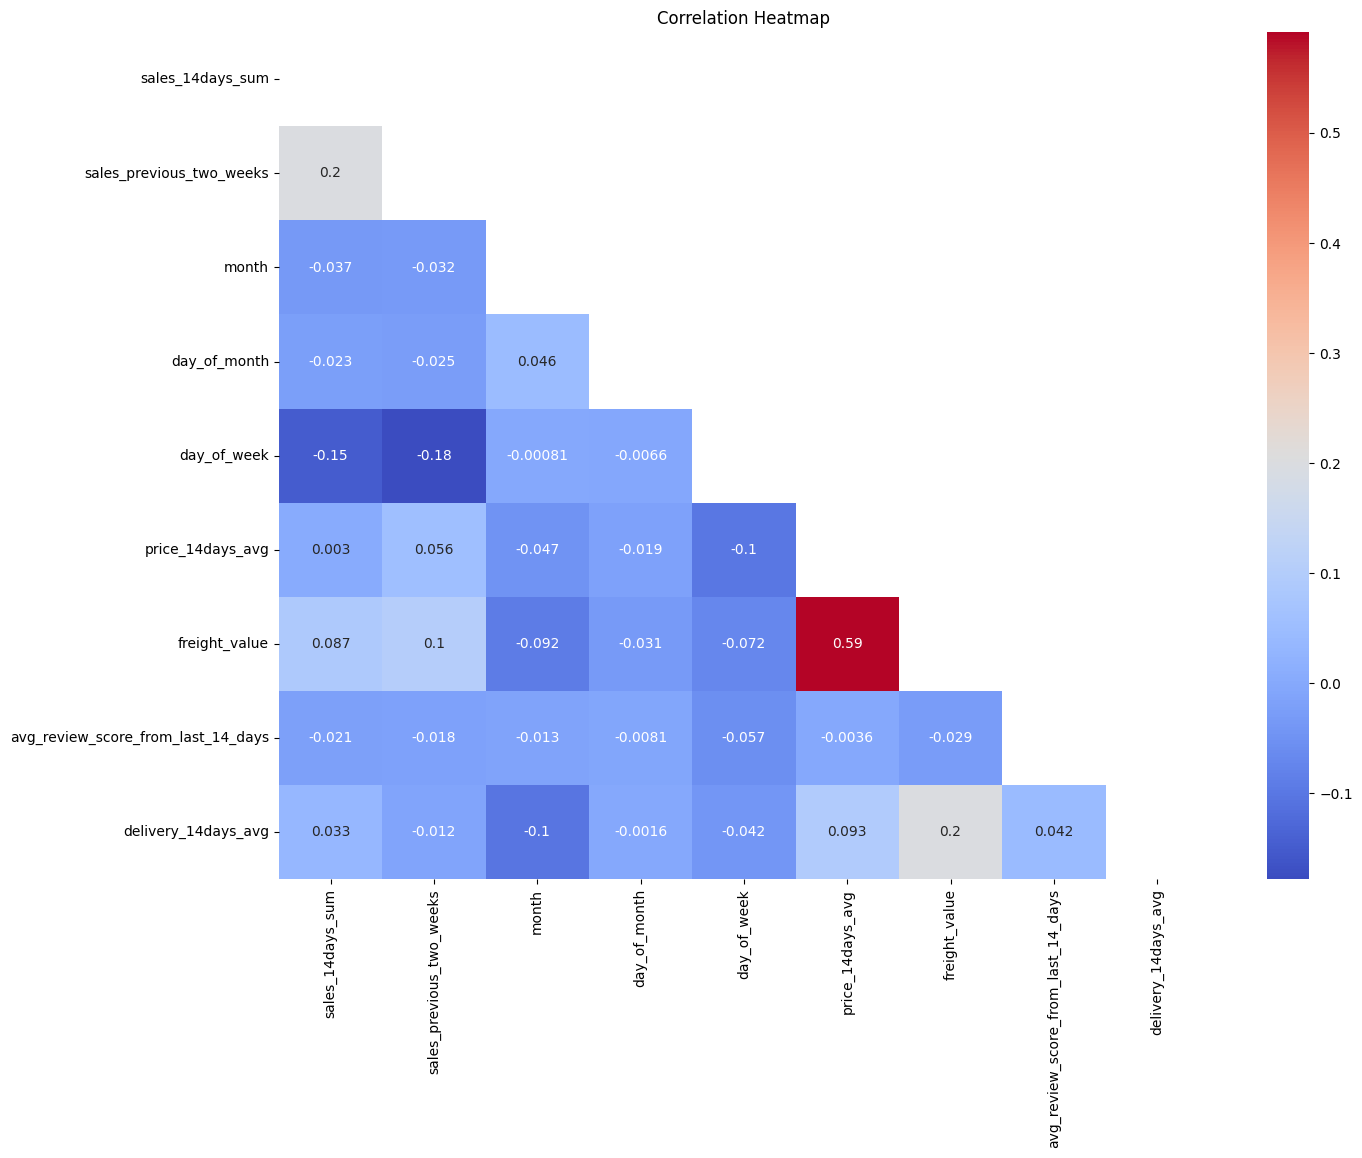

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

correlation_matrix = merged[['sales_14days_sum', 'sales_previous_two_weeks', 'month', 'day_of_month', 'day_of_week', 'price_14days_avg', 'freight_value', 
            'avg_review_score_from_last_14_days', 'delivery_14days_avg']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize = (15,11))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

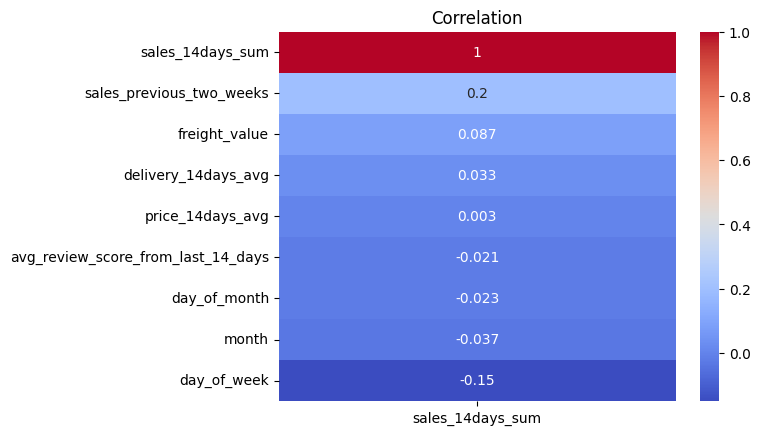

In [39]:
correlation_matrix = merged[['sales_14days_sum', 'sales_previous_two_weeks', 'month', 'day_of_month', 'day_of_week', 'price_14days_avg', 'freight_value', 
            'avg_review_score_from_last_14_days', 'delivery_14days_avg']].corr()
sns.heatmap(correlation_matrix[['sales_14days_sum']].sort_values(by='sales_14days_sum', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation')
plt.show()

##### Machine learning

In [40]:
merged.head()

,product_category,purchase_date,order_item_id,price,delivery_time,freight_value,sales_14days_sum,price_14days_avg,delivery_14days_avg,avg_review_score_from_last_14_days,sales_previous_two_weeks,month,day_of_month,day_of_week
34,health_beauty,2016-10-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10,13,3
44,computers_accessories,2016-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,10,18,1
45,baby,2016-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,10,18,1
51,cool_stuff,2016-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,10,18,1
59,electronics,2016-10-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,10,20,3


In [41]:
start_date = merged['purchase_date'].min()
end_date = merged['purchase_date'].max()
print(start_date, end_date)

2016-10-13 00:00:00 2018-08-27 00:00:00


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

train = merged[merged['purchase_date'] <= '2018-04-01']
test = merged[merged['purchase_date'] > '2018-04-01']

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

#machine learning model: randomforestregressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'MSE: {mse_rf}')

MSE: 11118.934725249643


##### Predict for each category

In [43]:
# predict
categories = merged['product_category'].unique()

predictions_list = []

for category in categories:
    
    category_data = merged[merged['product_category'] == category]
    category_data = category_data.sort_values(by='purchase_date')
    end_date = category_data['purchase_date'].max()
    
    future_sale = category_data.iloc[[-1]].copy()
    future_sale = future_sale[features]
    
    next_date = end_date + pd.Timedelta(days=14)
    
    future_sale['purchase_date'] = next_date
    future_sale['month'] = next_date.month
    future_sale['day_of_month'] = next_date.day
    future_sale['day_of_week'] = next_date.dayofweek
    
    pred = model_rf.predict(future_sale[features])
    predictions_list.append({'date': next_date, 'category': category, 'prediction': pred})
    
predictions_df = pd.DataFrame(predictions_list)
predictions_df.fillna(0, inplace=True)

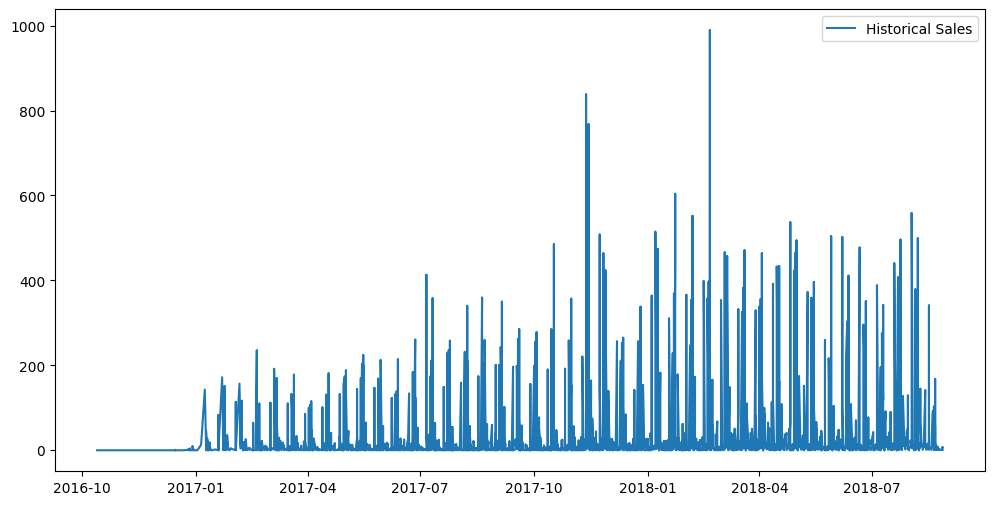

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(merged['purchase_date'], merged['sales_14days_sum'], label='Historical Sales')
plt.legend()
plt.show()

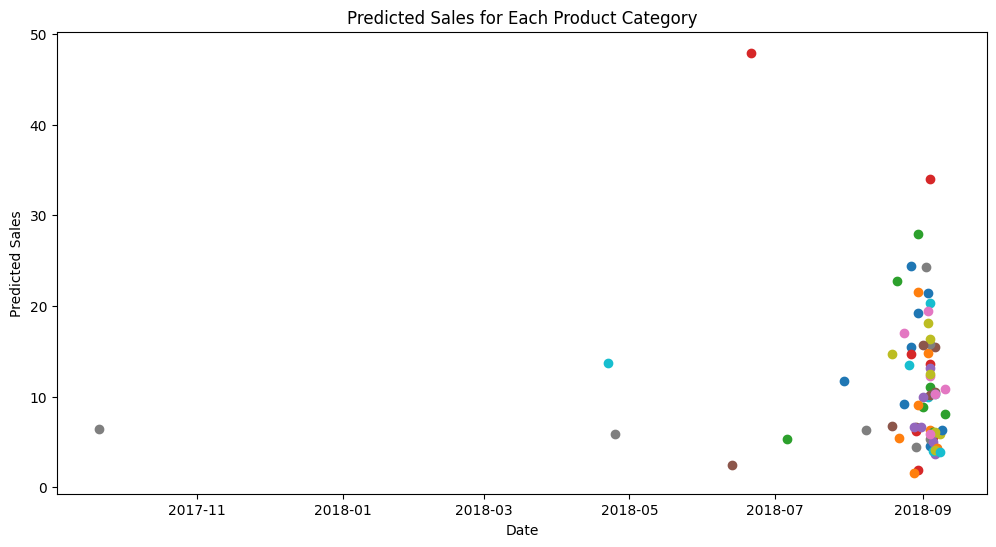

total sale in 14 days for auto category: [20.29]


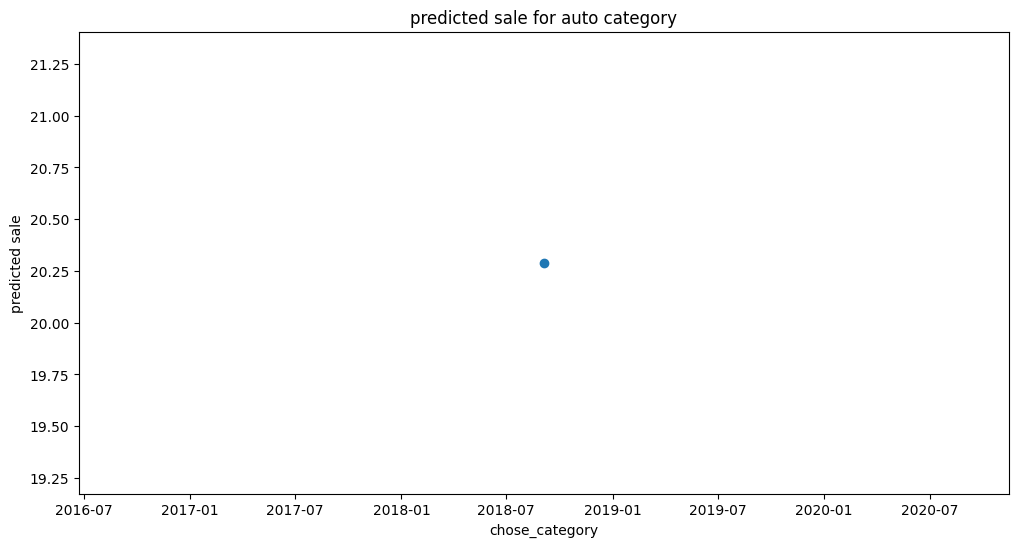

In [61]:
import matplotlib.pyplot as plt

# Assuming 'predictions_df' is already created as in the previous code snippet

# Plotting the forecasts using a scatter plot
plt.figure(figsize=(12, 6))

# Loop through each category
for category in predictions_df['category'].unique():
    category_data = predictions_df[predictions_df['category'] == category]
    plt.scatter(category_data['date'], category_data['prediction'], label=f'Predicted Sales for {category}')

plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales for Each Product Category')

plt.show()

chose_category = 'auto'

if chose_category in predictions_df['category'].unique():
    pred_cat = predictions_df[predictions_df['category']==chose_category]
    print(f'total sale in 14 days for {chose_category} category: {pred_cat['prediction'].sum()}')
    plt.figure(figsize=(12, 6))
    plt.scatter(pred_cat['date'], pred_cat['prediction'])
    plt.xlabel('chose_category')
    plt.ylabel('predicted sale')
    plt.title(f'predicted sale for {chose_category} category')
    plt.show()
else:
    print(f'no prediction for {chose_category} category')

In [69]:
print(sales_14d[sales_14d['product_category']=='auto'][['purchase_date', 'sales_14days_sum']].tail(20))

    purchase_date  sales_14days_sum
245    2017-11-28             193.0
246    2017-12-12             134.0
247    2017-12-26              84.0
248    2018-01-09             152.0
249    2018-01-23             133.0
250    2018-02-06             164.0
251    2018-02-20             176.0
252    2018-03-06             161.0
253    2018-03-20             187.0
254    2018-04-03             187.0
255    2018-04-17             165.0
256    2018-05-01             191.0
257    2018-05-15             120.0
258    2018-05-29             151.0
259    2018-06-12             148.0
260    2018-06-26             131.0
261    2018-07-10             174.0
262    2018-07-24             231.0
263    2018-08-07             252.0
264    2018-08-21              56.0


In [70]:
print(daily_sales[daily_sales['product_category']=='auto'][['purchase_date', 'daily_sales']].tail(20))

     purchase_date  daily_sales
1306    2018-08-09         21.0
1307    2018-08-10         19.0
1308    2018-08-11         13.0
1309    2018-08-12         12.0
1310    2018-08-13         22.0
1311    2018-08-14         34.0
1312    2018-08-15         11.0
1313    2018-08-16         21.0
1314    2018-08-17         11.0
1315    2018-08-18         12.0
1316    2018-08-19          5.0
1317    2018-08-20         18.0
1318    2018-08-21         12.0
1319    2018-08-22         18.0
1320    2018-08-23          8.0
1321    2018-08-24          3.0
1322    2018-08-25          4.0
1323    2018-08-26          5.0
1324    2018-08-27          4.0
1325    2018-08-28          2.0


##### Predict for categories that occured last date

In [46]:
# predict
end_date = merged['purchase_date'].max() - pd.Timedelta(days=7)
last_date = merged[merged['purchase_date']==end_date]
categories = last_date['product_category'].unique()

predictions_list2 = []

next_date = end_date + pd.Timedelta(days=14)

for category in categories:
    
    category_data = merged[merged['product_category'] ==category]
    category_data = category_data.sort_values(by='purchase_date')
    
    future_sale = category_data.iloc[[-1]].copy()
    future_sale = future_sale[features]

    future_sale['purchase_date'] = next_date
    future_sale['month'] = next_date.month
    future_sale['day_of_month'] = next_date.day
    future_sale['day_of_week'] = next_date.dayofweek
    
    pred = model_rf.predict(future_sale[features])
    predictions_list2.append({'date': next_date, 'category': category, 'prediction': pred})

predictions_df2 = pd.DataFrame(predictions_list2)
predictions_df2.fillna(0, inplace=True)

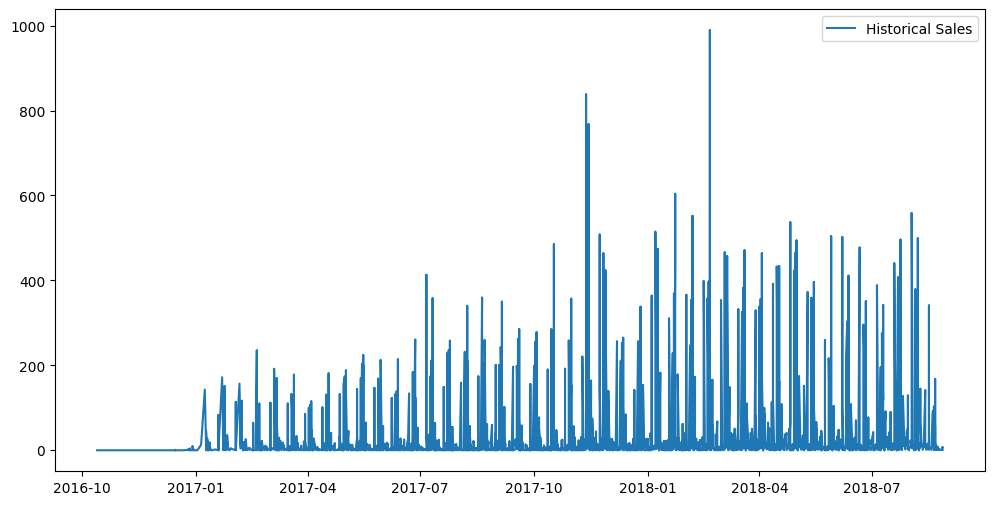

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(merged['purchase_date'], merged['sales_14days_sum'], label='Historical Sales')
plt.legend()
plt.show()

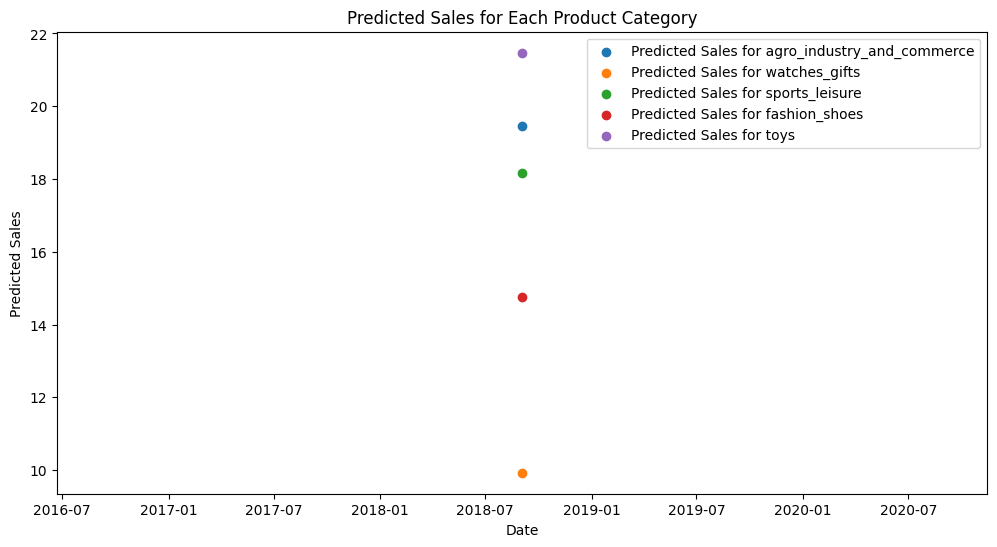

In [48]:
import matplotlib.pyplot as plt

# Assuming 'predictions_df' is already created as in the previous code snippet

# Plotting the forecasts using a scatter plot
plt.figure(figsize=(12, 6))

# Loop through each category
for category in predictions_df2['category'].unique():
    category_data = predictions_df2[predictions_df2['category'] == category]
    plt.scatter(category_data['date'], category_data['prediction'], label=f'Predicted Sales for {category}')

plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales for Each Product Category')
plt.legend()
plt.show()

# Task 2 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = 'S_Data/'
endpoint = '.csv'

csvs = ['customers', 
        'geolocation', 
        'order_items', 
        'order_payments', 
        'order_reviews', 
        'orders', 
        'product_category_name_translation',
        'products',
        'sellers']
dfs = {}

for name in csvs:
    print(name.upper())
    dfs[name] = pd.read_csv(path+name+endpoint)

dfs['orders']['order_purchase_timestamp'] = pd.to_datetime(dfs['orders']['order_purchase_timestamp'])
# get english category name
dfs['products'] = dfs['products'].merge(dfs['product_category_name_translation'],
                                        how = 'inner',
                                        on = 'product_category_name')

CUSTOMERS
GEOLOCATION
ORDER_ITEMS
ORDER_PAYMENTS
ORDER_REVIEWS
ORDERS
PRODUCT_CATEGORY_NAME_TRANSLATION
PRODUCTS
SELLERS


In [8]:
## function filters data by date if necessary
def get_turnover(df, start_day, start_month, start_year, end_day, end_month, end_year):
    
    start_date = pd.Timestamp(year=start_year, month=start_month, day=start_day)
    end_date = pd.Timestamp(year=end_year, month=end_month, day=end_day)
    
    df_filtered = df[df['order_purchase_timestamp'].between(start_date, end_date)]
    
    return df

In [26]:
sales_areas = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'left')
sales_areas = sales_areas.merge(dfs['products'], on = 'product_id', how = 'left')

#### 1. the sellers with the biggest/smallest turnover

##### Code

In [41]:
# parameters

# select how many top sellers you want to see
top = 10

## select time period for turnover per seller
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

In [44]:
turnover = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'left')

# get amount for each order
turnover['total_amount'] = turnover['order_item_id']*turnover['price'] + turnover['order_item_id']*turnover['freight_value']

if start_year !=0 and end_year !=0:
    turnover_df = get_turnover(turnover, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    turnover_df = turnover

# get total incomes per seller
turnover_per_seller = turnover_df.groupby('seller_id')['total_amount'].sum().reset_index().sort_values(by='total_amount', ascending = False)
turnover_per_seller = turnover_per_seller.merge(dfs['sellers'], on = 'seller_id', how = 'left')  

if top < turnover_per_seller.size:
    print(f'top {top} sellers with biggest turnover: \n', turnover_per_seller.head(top), '\n')
    print(f'top {top} sellers with smallest turnover: \n', turnover_per_seller.tail(top))
else:
    print('sellers turnover: \n', turnover_per_seller)

top 10 sellers with biggest turnover: 
                           seller_id  total_amount  seller_zip_code_prefix  \
0  7c67e1448b00f6e969d365cea6b010ab     375389.31                    8577   
1  4a3ca9315b744ce9f8e9374361493884     266660.94                   14940   
2  53243585a1d6dc2643021fd1853d8905     260379.81                   42738   
3  4869f7a5dfa277a7dca6462dcf3b52b2     256418.18                   14840   
4  1025f0e2d44d7041d6cf58b6550e0bfa     240516.24                    3204   
5  da8622b14eb17ae2831f4ac5b9dab84a     228418.57                   13405   
6  1f50f920176fa81dab994f9023523100     214499.35                   15025   
7  fa1c13f2614d7b5c4749cbc52fecda94     205775.24                   13170   
8  955fee9216a65b617aa5c0531780ce60     198078.49                    4782   
9  7e93a43ef30c4f03f38b393420bc753a     184320.77                    6429   

             seller_city seller_state  
0        itaquaquecetuba           SP  
1               ibitinga        

##### Plots

C:\Users\olows\AppData\Local\Temp\ipykernel_12952\4089717835.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


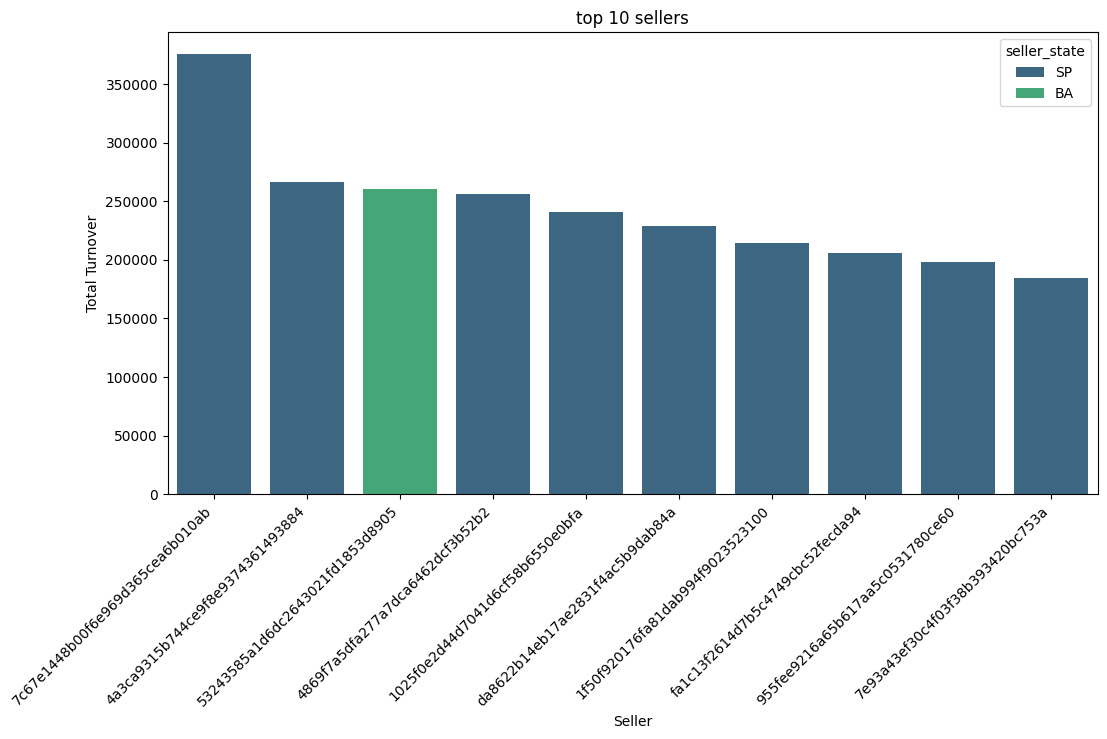

In [49]:
# Leaders
leaders_plt = turnover_per_seller.head(top)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='seller_id', y='total_amount', data=leaders_plt, palette='viridis', hue='seller_state')
plt.title(f'top {top} sellers')
plt.xlabel('Seller')
plt.ylabel('Total Turnover')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

C:\Users\olows\AppData\Local\Temp\ipykernel_12952\4245486627.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


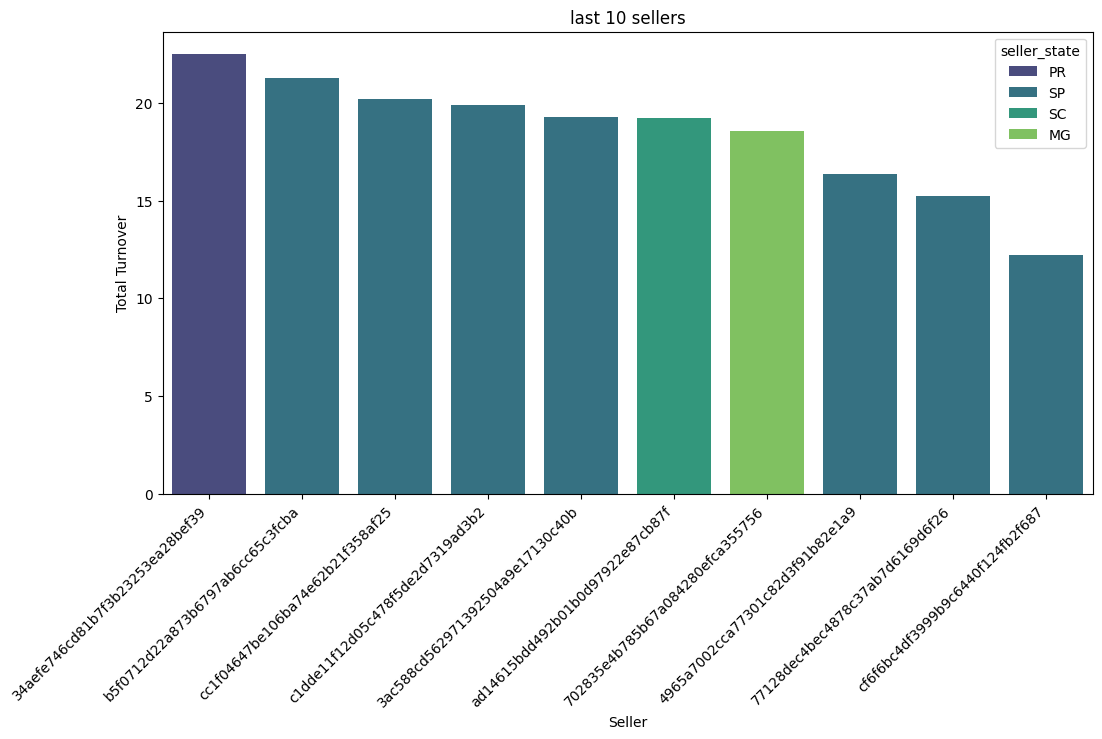

In [50]:
# Losers
leaders_plt = turnover_per_seller.tail(top)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='seller_id', y='total_amount', data=leaders_plt, palette='viridis', hue='seller_state')
plt.title(f'last {top} sellers')
plt.xlabel('Seller')
plt.ylabel('Total Turnover')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

#### 2. leaders/outsiders in sales in each area 

##### Code

In [51]:
# parameters

# select how many top sellers you want to see
top = 3

## select time period for turnover per seller
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

# select categories you want to see leaders and outsiders in
# you can select one category as string or many as list
# if other type will be provided you will see leaders and outsiders for all categories
category = ['art', 'auto']

In [53]:
if start_year !=0 and end_year !=0:
    sales_areas_df = get_turnover(sales_areas, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    sales_areas_df = sales_areas

In [54]:
all_categories = sales_areas_df['product_category_name_english'].unique()
all_categories = all_categories.astype(str)
all_categories = np.sort(all_categories)
for el in all_categories:
    print(el)

agro_industry_and_commerce
air_conditioning
art
arts_and_craftmanship
audio
auto
baby
bed_bath_table
books_general_interest
books_imported
books_technical
cds_dvds_musicals
christmas_supplies
cine_photo
computers
computers_accessories
consoles_games
construction_tools_construction
construction_tools_lights
construction_tools_safety
cool_stuff
costruction_tools_garden
costruction_tools_tools
diapers_and_hygiene
drinks
dvds_blu_ray
electronics
fashio_female_clothing
fashion_bags_accessories
fashion_childrens_clothes
fashion_male_clothing
fashion_shoes
fashion_sport
fashion_underwear_beach
fixed_telephony
flowers
food
food_drink
furniture_bedroom
furniture_decor
furniture_living_room
furniture_mattress_and_upholstery
garden_tools
health_beauty
home_appliances
home_appliances_2
home_comfort_2
home_confort
home_construction
housewares
industry_commerce_and_business
kitchen_dining_laundry_garden_furniture
la_cuisine
luggage_accessories
market_place
music
musical_instruments
nan
office_furnit

In [55]:
def print_data(data, category_name, top):
    if top < data.size:
        print(f'top {top} leaders with biggest turnover in category {category_name}: \n', data.head(top), '\n')
        print(f'top {top} outsiders with smallest turnover in category {category_name}: \n', data.tail(top))
        # possible to print every seller that sold the same amount of item if number of such sellers is bigger than top parameter
    else:
        print(f'sellers turnover in category {category_name}: \n', data)

In [58]:
# get amount for each order
sales_areas_df['total_amount'] = sales_areas_df['order_item_id']*sales_areas_df['price'] + sales_areas_df['order_item_id']*sales_areas_df['freight_value']

turnover_per_category_seller = sales_areas_df.groupby(['product_category_name_english', 'seller_id'])['total_amount'].sum().reset_index()
turnover_per_category_seller = turnover_per_category_seller.merge(dfs['sellers'], on = 'seller_id', how = 'left')  

if isinstance(category, list):
    for el in category:
        category_data = turnover_per_category_seller.loc[turnover_per_category_seller['product_category_name_english'] == el].sort_values(by='total_amount', ascending= False)
        print_data(category_data, el, top)
        print('\n')
elif isinstance(category, str):
    category_data = turnover_per_category_seller.loc[turnover_per_category_seller['product_category_name_english'] == category].sort_values(by='total_amount', ascending= False)
    print_data(category_data, category, top)

else:
    for el in all_categories:
        category_data = turnover_per_category_seller.loc[turnover_per_category_seller['product_category_name_english'] == el].sort_values(by='total_amount', ascending= False)
        print_data(category_data, el, top)
        print('\n')

top 3 leaders with biggest turnover in category art: 
     product_category_name_english                         seller_id  \
116                           art  c31eff8334d6b3047ed34bebd4d62c36   
120                           art  ee27a8f15b1dded4d213a468ba4eb391   
109                           art  a0e19590a0923cdd0614ea9427713ced   

     total_amount  seller_zip_code_prefix           seller_city seller_state  
116      13389.07                   13322                 salto           SP  
120       6726.66                   74210               goiania           GO  
109       1263.52                   83075  sao jose dos pinhais           PR   

top 3 outsiders with smallest turnover in category art: 
     product_category_name_english                         seller_id  \
100                           art  6614814a00d344b846ae209f95ee7e3f   
121                           art  f593898ec748b7a8cb81fc04edafd98a   
117                           art  cf6f6bc4df3999b9c6440f124fb2f687   


##### Plots

C:\Users\olows\AppData\Local\Temp\ipykernel_12952\298100872.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='product_category_name_english', y='total_amount', data=best_sellers, palette='viridis')
C:\Users\olows\AppData\Local\Temp\ipykernel_12952\298100872.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


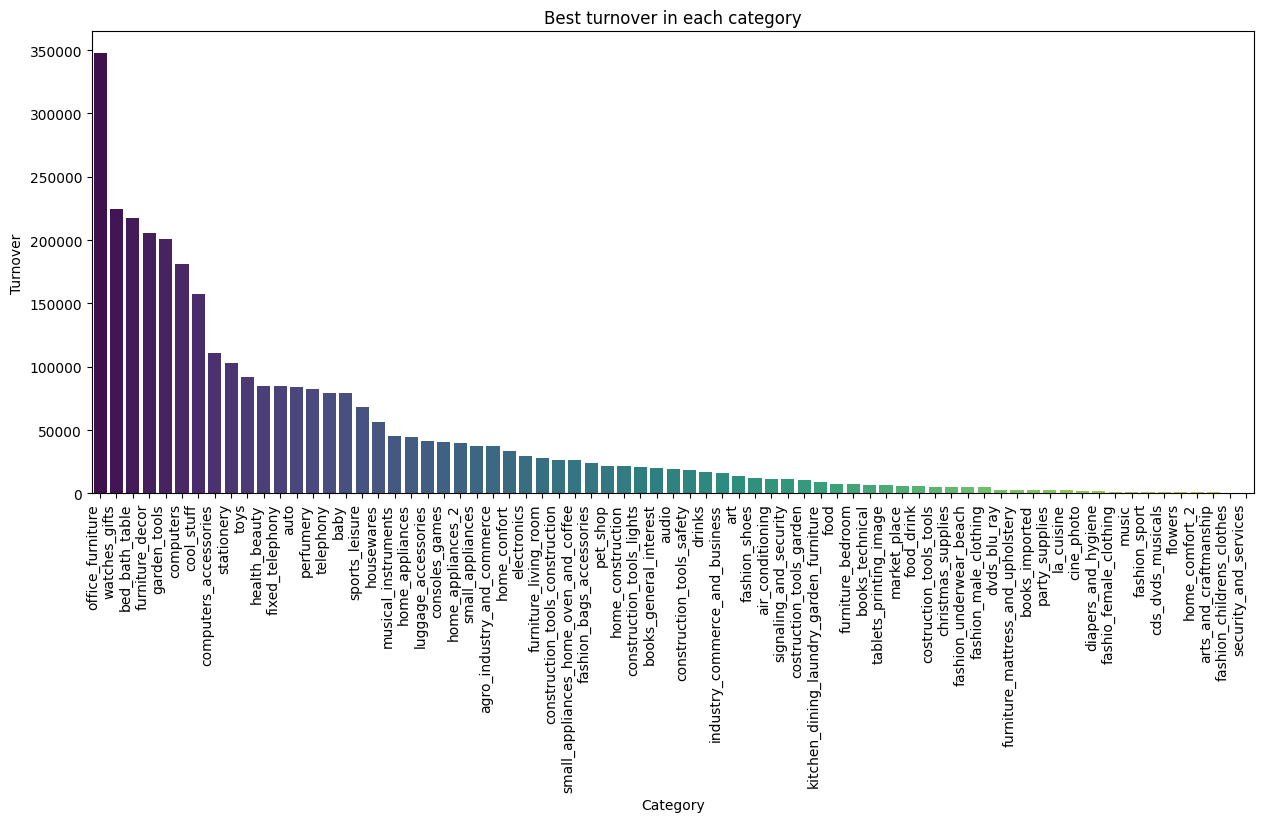

In [64]:
# highest turnover in each category
total_turnover_per_cat = sales_areas_df.groupby(['product_category_name_english', 'seller_id'])['total_amount'].sum().reset_index()
best_per_cat = total_turnover_per_cat.groupby('product_category_name_english')['total_amount'].max().reset_index().sort_values(by= 'total_amount', ascending = False)

best_sellers = pd.merge(best_per_cat, total_turnover_per_cat, on=['product_category_name_english', 'total_amount'])
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='product_category_name_english', y='total_amount', data=best_sellers, palette='viridis')
plt.title('Best turnover in each category')
plt.xlabel('Category')
plt.ylabel('Turnover')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

#### 3. which products sell best in each category

##### Code

In [28]:
all_categories = sales_areas['product_category_name_english'].unique()
all_categories = all_categories.astype(str)
all_categories = np.sort(all_categories)
for el in all_categories:
    print(el)

agro_industry_and_commerce
air_conditioning
art
arts_and_craftmanship
audio
auto
baby
bed_bath_table
books_general_interest
books_imported
books_technical
cds_dvds_musicals
christmas_supplies
cine_photo
computers
computers_accessories
consoles_games
construction_tools_construction
construction_tools_lights
construction_tools_safety
cool_stuff
costruction_tools_garden
costruction_tools_tools
diapers_and_hygiene
drinks
dvds_blu_ray
electronics
fashio_female_clothing
fashion_bags_accessories
fashion_childrens_clothes
fashion_male_clothing
fashion_shoes
fashion_sport
fashion_underwear_beach
fixed_telephony
flowers
food
food_drink
furniture_bedroom
furniture_decor
furniture_living_room
furniture_mattress_and_upholstery
garden_tools
health_beauty
home_appliances
home_appliances_2
home_comfort_2
home_confort
home_construction
housewares
industry_commerce_and_business
kitchen_dining_laundry_garden_furniture
la_cuisine
luggage_accessories
market_place
music
musical_instruments
nan
office_furnit

In [29]:
# parameters

## select time period for products sale
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

# select categories you want to see best products in
# you can select one category as a string or many as a list
# if other type will be provided you will see leaders and outsiders for all categories
category = None

In [30]:
def print_data(data, category):
    if len(data) > 0:
        sold = round(data.sort_values(by='sold_items', ascending=False)['sold_items'].values[0], 0)
        data = data.loc[data['sold_items'] == sold]
        
        if len(data) > 1:
            print(f'best-selling products in category {category} (sold {sold}): \n', data['product_id'].values)
            # possible to print every seller that sold the same amount of item if number of such sellers is bigger than top parameter
        else:
            print(f'best-selling product in category {category} (sold {sold}): \n', data['product_id'].values)
    else:
        print(f'no product sold in category {category}')

In [31]:
data = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'left')
data = data.merge(dfs['products'], on = 'product_id', how = 'left')

if start_year !=0 and end_year !=0:
    products_df = get_turnover(data, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    products_df = data

best_products = products_df.groupby('product_id')['order_item_id'].sum().reset_index()
best_products.rename(columns={'order_item_id': 'sold_items'}, inplace=True)
best_products = best_products.merge(dfs['products'], on = 'product_id', how = 'left')

if isinstance(category, list):
    for el in category:
        prod_data = best_products.loc[best_products['product_category_name_english'] == el]
        print_data(prod_data, el)
elif isinstance(category, str):
        prod_data = best_products.loc[best_products['product_category_name_english'] == category]
        print_data(prod_data, category)
else:
    for el in all_categories:
        prod_data = best_products.loc[best_products['product_category_name_english'] == el]
        print_data(prod_data, el)

best-selling product in category agro_industry_and_commerce (sold 23.0): 
 ['11250b0d4b709fee92441c5f34122aed']
best-selling product in category air_conditioning (sold 30.0): 
 ['f2a1b32f85cad59ff2a8444154ac25f0']
best-selling product in category art (sold 111.0): 
 ['4fe644d766c7566dbc46fb851363cb3b']
best-selling product in category arts_and_craftmanship (sold 5.0): 
 ['b9976e9c22fb1540bd71d1bcd2989475']
best-selling product in category audio (sold 49.0): 
 ['db5efde3ad0cc579b130d71c4b2db522']
best-selling product in category auto (sold 210.0): 
 ['9571759451b1d780ee7c15012ea109d4']
best-selling product in category baby (sold 95.0): 
 ['cac9e5692471a0700418aa3400b9b2b1']
best-selling product in category bed_bath_table (sold 542.0): 
 ['99a4788cb24856965c36a24e339b6058']
best-selling product in category books_general_interest (sold 61.0): 
 ['f35927953ed82e19d06ad3aac2f06353']
best-selling product in category books_imported (sold 9.0): 
 ['68ad45d48d69404aeb71ce87e1b2c948']
best-selli

##### Plots

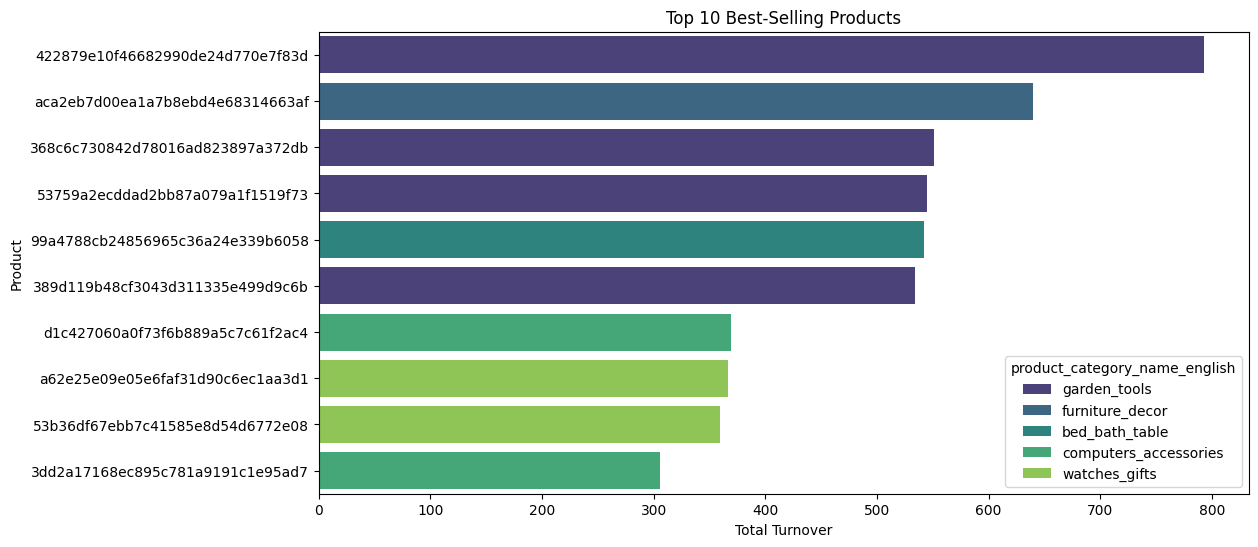

In [38]:
b_prod_plt = best_products.sort_values(by='sold_items', ascending = False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='sold_items', y='product_id', data=b_prod_plt, palette='viridis', hue='product_category_name_english')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Turnover')
plt.ylabel('Product')
plt.show()

#### 4. the dependence of product weight on turnover and price.

##### Code

In [9]:
# parameters

## select time period for products sale
## if year parameters are 0 whole data frame will be used
start_day = 1
start_month = 1
start_year = 0
end_day = 1
end_month = 1
end_year = 0

In [12]:
task_4 = dfs['orders'].merge(dfs['order_items'], on = 'order_id', how = 'inner')

if start_year !=0 and end_year !=0:
    task_4 = get_turnover(task_4, start_day, start_month, start_year, end_day, end_month, end_year)
else:
    pass

task_4['turnover'] = task_4['price']*task_4['order_item_id'] + task_4['freight_value']*task_4['order_item_id']
task_4 = task_4.groupby('product_id').agg({'turnover': 'sum', 'price': 'mean', 'freight_value': 'mean'}).reset_index()
task_4 = task_4.merge(dfs['products'], on = 'product_id', how = 'left')

##### Plots

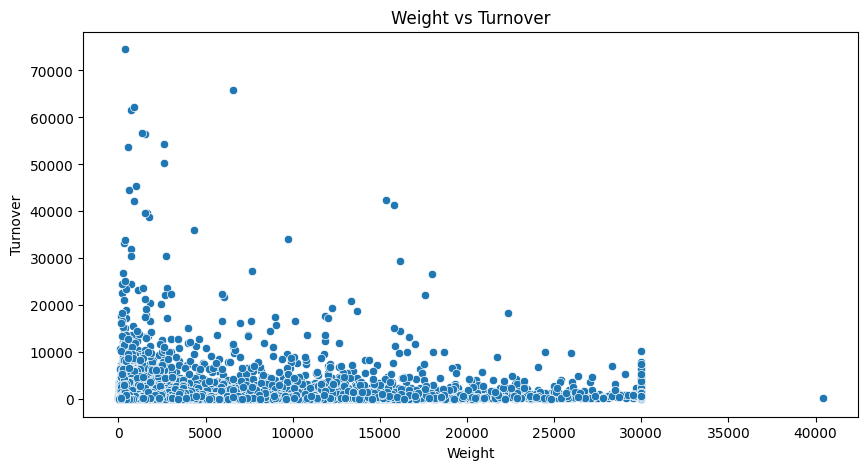

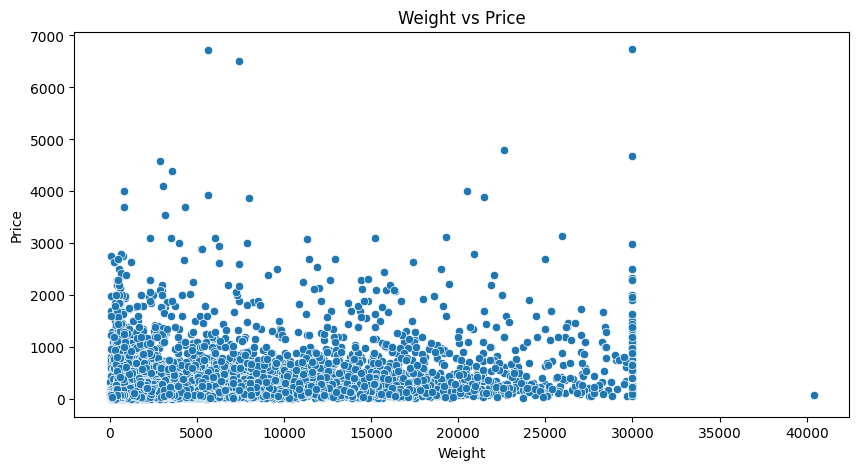

In [18]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=task_4['product_weight_g'], y=task_4['turnover'])
plt.title('Weight vs Turnover')
plt.xlabel('Weight')
plt.ylabel('Turnover')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x=task_4['product_weight_g'], y=task_4['price'])
plt.title('Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show()

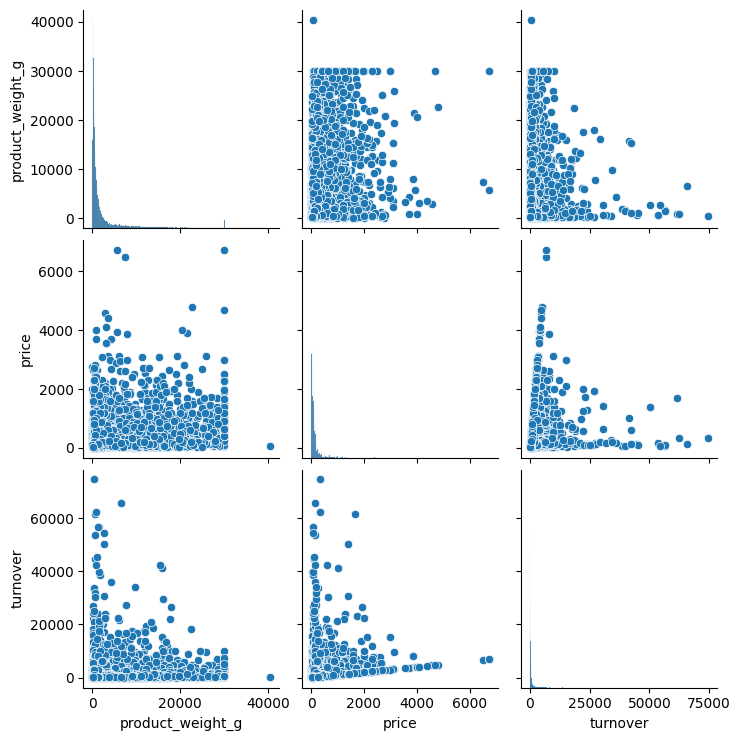

In [19]:
sns.pairplot(task_4[['product_weight_g', 'price', 'turnover']])

plt.show()

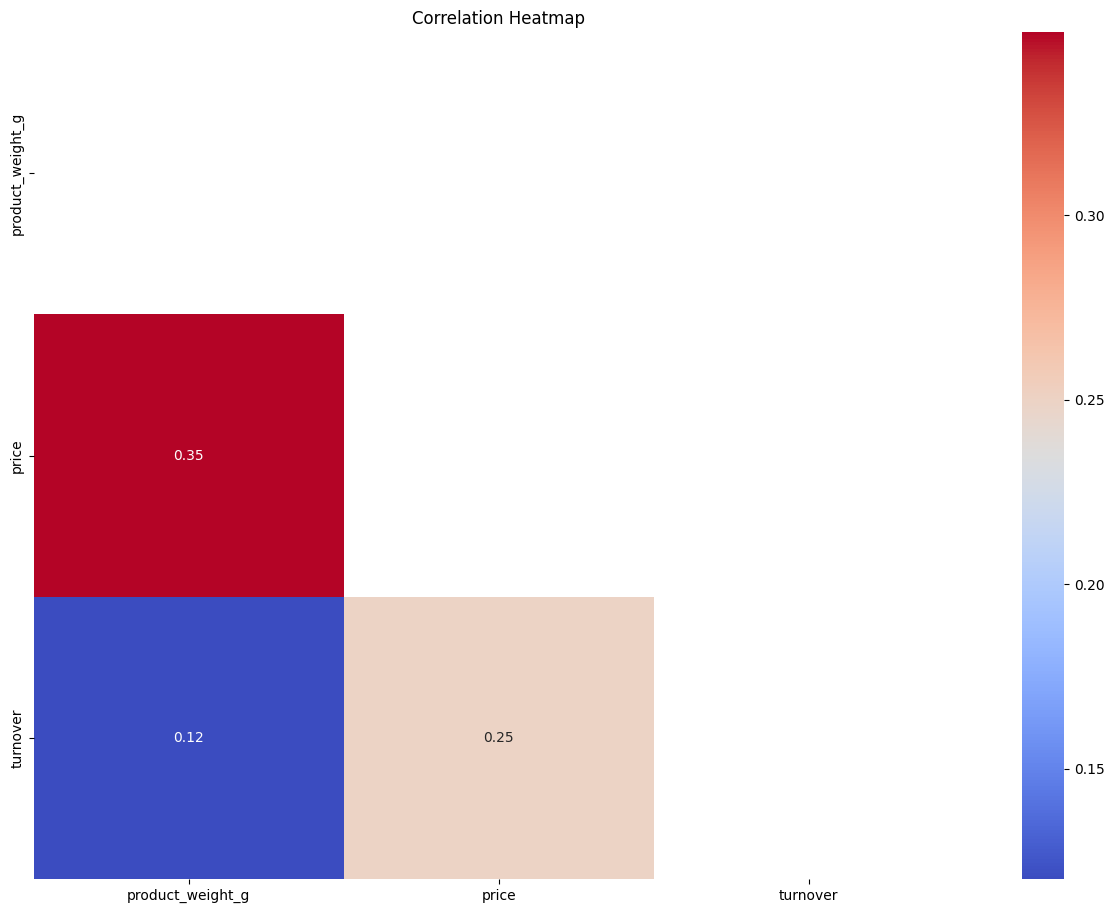

In [20]:
correlation_matrix = task_4[['product_weight_g', 'price', 'turnover']].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize = (15,11))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between product weight, price and turnover')
plt.show()

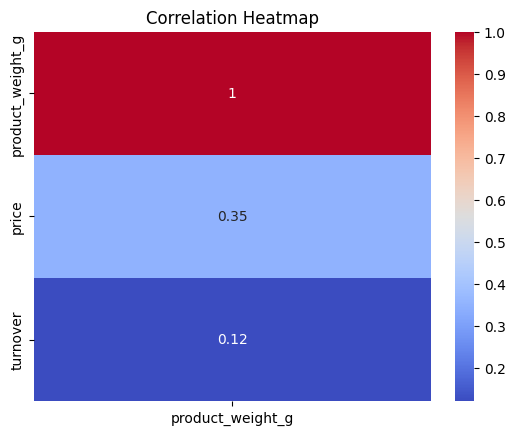

In [24]:
correlation_matrix = task_4[['product_weight_g', 'price', 'turnover']].corr()
sns.heatmap(correlation_matrix[['product_weight_g']].sort_values(by='product_weight_g', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation between product weight and price product weight and turnover')
plt.show()

# Task 3

In [42]:
dfs['order_items'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

path = 'S_Data/'
endpoint = '.csv'

csvs = ['customers', 
        'geolocation', 
        'order_items', 
        'order_payments', 
        'order_reviews', 
        'orders', 
        'product_category_name_translation',
        'products',
        'sellers']
dfs = {}

for name in csvs:
    print(name.upper())
    dfs[name] = pd.read_csv(path+name+endpoint)

dfs['order_reviews'].head()

CUSTOMERS
GEOLOCATION
ORDER_ITEMS
ORDER_PAYMENTS
ORDER_REVIEWS
ORDERS
PRODUCT_CATEGORY_NAME_TRANSLATION
PRODUCTS
SELLERS


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [44]:
def preprocess(text, lang = 'portuguese'):

    tokens = word_tokenize(text, language=lang)

    stop_words = set(stopwords.words(lang))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

In [50]:
merged_df = dfs['order_reviews'].merge(dfs['order_items'], on = 'order_id')
review_messages = merged_df.dropna(subset=('review_comment_message'))
review_titles = dfs['order_reviews'].dropna(subset=(['review_comment_message', 'review_comment_title']))

##### Predict if message is positive or negative

In [51]:
nltk.download('punkt')
nltk.download('stopwords')

review_messages['preprocessed'] = review_messages['review_comment_message'].apply(preprocess)
review_messages['sentiment'] = review_messages['review_score'].apply(lambda x: 1 if x > 3 else 0)

X_train, X_test, y_train, y_test = train_test_split(review_messages['preprocessed'], review_messages['sentiment'], test_size=0.2, random_state=42)
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)

review_messages['predicted_sentiment'] = model.predict(review_messages['preprocessed'])

print(f'model accuracy: {accuracy*100:.2f}%')

#print(review_messages[['predicted_sentiment', 
#                       'review_comment_message', 
#                       'sentiment', 
#                       'predicted_sentiment']].head(50))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olows\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olows\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\olows\AppData\Local\Temp\ipykernel_8176\674464373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_messages['preprocessed'] = review_messages['review_comment_message'].apply(preprocess)
C:\Users\olows\AppData\Local\Temp\ipykernel_8176\674464373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

model accuracy: 88.77%


C:\Users\olows\AppData\Local\Temp\ipykernel_8176\674464373.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_messages['predicted_sentiment'] = model.predict(review_messages['preprocessed'])


In [52]:
correlation = review_messages['predicted_sentiment'].corr(review_messages['review_score'])
print(f"Correlation between predicted sentiment and rating: {correlation:.2f}")

Correlation between predicted sentiment and rating: 0.79


In [54]:
best_reviews = review_messages[review_messages['review_score'] >= 4]
worst_reviews = review_messages[review_messages['review_score'] <= 2]

negative_fb = review_messages[review_messages['predicted_sentiment'] == 0].groupby('seller_id').filter(lambda x: len(x) == len(review_messages[review_messages['seller_id'] == x.name]))

sellers with only negative feedback:
['c1d1ebb4745cc43cb6f05e9c8a705c9a' '70c4eedec9cb4a85cda2f3f9673557b4'
 'fcf16b7a8697e559f0123190bb30177d' 'dff87e4de60c9736ce8df835951b09bc'
 '35857757f553273b1056c1cabdace7fb' '1bc2e21de46adfea6b98cc96b00f3b40'
 '24c1de8d9551c0b4fbc53317d53efda8' 'b274baf5bbd142410eb2958cf685d684'
 'c53bcd3be457a342a97e39e5a9f0be22' 'fedf2c1386e137f296b3bbf3b635e69d'
 '1b65c144b17e607c0f37f10bb7dfec8d' 'eddd1991bd6d9309995a480c39b95137'
 'ab75b89cc49c9ab3160d0c91565a442a' 'c286ec035ee04ba81c97508f0b5df544'
 '9b1050e85becf3ae99c1cf4934c9bc5d' 'f44bdc12aa39f5271f0b95f66cd4c289'
 '9cad4b68bb993ee401a3c5aaa2bc26dd' '270d3ef21830ad0ecf3a6c53d08a533a'
 'e09887ca8c7bf8a4621ce481820414ef' '37ceb404da208418c9032f0674e57804'
 '3820c6537b3853be1a0687d5a60807ec' '1961c3e1272bfeceb05d0b78b5bbfdaf'
 'd1e2fe627180431ffda076abb303c56f' '324583d68897f5ddbaf38f6248322176'
 'cad9969167c09b48ae6f1d123f7fa68d' 'f9903dd0f812c7e771fcad47b6fff231'
 'e3e290b38963293022cdcd6db8328103' 'f63

##### Sellers with only negative feedback

In [57]:
print(f'number of sellers with only negative feedback: {len(review_messages['seller_id'].unique())}')
print('sellers with only negative feedback:')
#print(negative_fb['seller_id'].unique())

number of sellers with only negative feedback: 2567
sellers with only negative feedback:
['c1d1ebb4745cc43cb6f05e9c8a705c9a' '70c4eedec9cb4a85cda2f3f9673557b4'
 'fcf16b7a8697e559f0123190bb30177d' 'dff87e4de60c9736ce8df835951b09bc'
 '35857757f553273b1056c1cabdace7fb' '1bc2e21de46adfea6b98cc96b00f3b40'
 '24c1de8d9551c0b4fbc53317d53efda8' 'b274baf5bbd142410eb2958cf685d684'
 'c53bcd3be457a342a97e39e5a9f0be22' 'fedf2c1386e137f296b3bbf3b635e69d'
 '1b65c144b17e607c0f37f10bb7dfec8d' 'eddd1991bd6d9309995a480c39b95137'
 'ab75b89cc49c9ab3160d0c91565a442a' 'c286ec035ee04ba81c97508f0b5df544'
 '9b1050e85becf3ae99c1cf4934c9bc5d' 'f44bdc12aa39f5271f0b95f66cd4c289'
 '9cad4b68bb993ee401a3c5aaa2bc26dd' '270d3ef21830ad0ecf3a6c53d08a533a'
 'e09887ca8c7bf8a4621ce481820414ef' '37ceb404da208418c9032f0674e57804'
 '3820c6537b3853be1a0687d5a60807ec' '1961c3e1272bfeceb05d0b78b5bbfdaf'
 'd1e2fe627180431ffda076abb303c56f' '324583d68897f5ddbaf38f6248322176'
 'cad9969167c09b48ae6f1d123f7fa68d' 'f9903dd0f812c7e771fcad

##### Prices highlighted

In [75]:
import re

def highlight_price(review):
    if isinstance(review, str):
        return re.findall(r'\d+', review)
    else:
        return []
dfs['order_reviews']['prices'] = dfs['order_reviews']['review_comment_message'].apply(highlight_price)

prices_mentioned = dfs['order_reviews'][dfs['order_reviews']['prices'].astype(bool)]
print(f'comments with prices mentioned (number of reviews with prices: {prices_mentioned.size}')
print(prices_mentioned[['review_comment_message', 'prices']].head())

comments with prices mentioned (number of reviews with prices: 34952
                                review_comment_message  \
9    aparelho eficiente. no site a marca do aparelh...   
22                                        Loja nota 10   
51   recebi somente 1 controle Midea Split ESTILO.\...   
115  Este foi o pedido\r\nBalde Com 128 Peças - Blo...   
168  Comprei o produto dia 25 de fevereiro e hoje d...   

                              prices  
9                                [3]  
22                              [10]  
51                               [1]  
115  [128, 2, 25, 00, 36, 1, 35, 90]  
168                         [25, 29]  
